In [1]:
from functools import partial
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "/scratch/nia4240/garg-scratch/models/"

In [2]:
df = read_run_dir(run_dir)
task = "gilad"
df = df[df['task'] == task]
df.head()

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
15,a776ed0a-1e0e-4c8d-bd60-40c834a7410f,gilad,Transformer,,-1,-1,20,12,1,%x_0
22,a5390bb9-2ac8-4c7c-a36a-1a7f64b9598a,gilad,Transformer,,-1,-1,20,12,1,%x_1
10,3668a944-446c-4cb5-990a-93cabcd117d9,gilad,Transformer,,-1,-1,20,12,4,%x_10
20,b00cde38-7a21-4ede-bb7c-b151a86cca6a,gilad,Transformer,,-1,-1,20,12,4,%x_11
0,716056a5-e81b-4c76-8f49-80fed2cbb719,gilad,Transformer,,-1,-1,20,12,8,%x_12


In [3]:
def get_mse(run_id, N):
    run_path = os.path.join(run_dir, "gilad", run_id)
    metrics = get_run_metrics(run_path, skip_model_load=True, skip_baselines=True)
    model_name = list(metrics["standard"])[0]
    # assert (model_name[:len("gpt2_embd=")] == "gpt2_embd=") or (model_name == "Transformer")
    return metrics["standard"][model_name]["mean"][N]

def get_conf(run_id):
    run_path = os.path.join(run_dir, task, run_id)
    _, conf = get_model_from_run(run_path, only_conf=True)
    return conf

def get_n_embd(run_id):
    return get_conf(run_id).model.n_embd

df["n_embd"] = df["run_id"].apply(get_n_embd)
df["MSE"] = df["run_id"].apply(partial(get_mse, N=40))

100%|██████████| 15/15 [00:00<00:00, 324301.86it/s]


In [4]:
df.head()

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name,n_embd,MSE
15,a776ed0a-1e0e-4c8d-bd60-40c834a7410f,gilad,Transformer,,-1,-1,20,12,1,%x_0,48,0.031510
22,a5390bb9-2ac8-4c7c-a36a-1a7f64b9598a,gilad,Transformer,,-1,-1,20,12,1,%x_1,48,0.060020
10,3668a944-446c-4cb5-990a-93cabcd117d9,gilad,Transformer,,-1,-1,20,12,4,%x_10,48,0.067716
20,b00cde38-7a21-4ede-bb7c-b151a86cca6a,gilad,Transformer,,-1,-1,20,12,4,%x_11,48,0.078637
0,716056a5-e81b-4c76-8f49-80fed2cbb719,gilad,Transformer,,-1,-1,20,12,8,%x_12,48,0.114536


<AxesSubplot:xlabel='n_head', ylabel='MSE'>

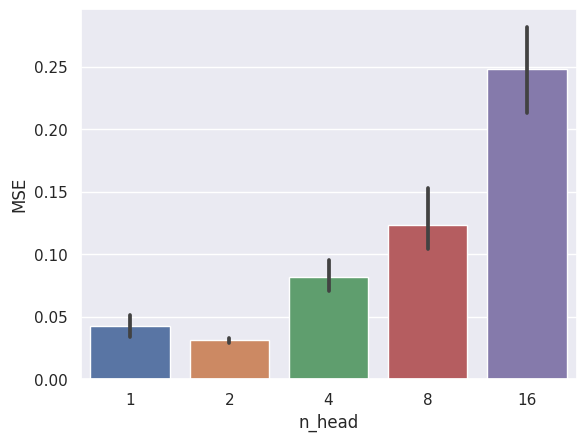

In [5]:
sns.barplot(data=df, x="n_head", y="MSE")